In [49]:
import numpy as np
import pandas as pd

import seaborn as sns

In [50]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [51]:
#Tensorflow works only on numpy arrays.
from sklearn.model_selection import train_test_split
X = df[['feature1','feature2']].values
y = df[['price']].values

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [53]:
from sklearn.preprocessing import MinMaxScaler
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [54]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [55]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.54249473,  0.54328931],
       [ 0.40972853,  0.67589824],
       [ 0.89792435,  0.38027611],
       [ 0.56655528,  0.54066167],
       [ 0.83569889,  0.48343275],
       [ 0.5473575 ,  0.61205685],
       [ 0.40458321,  0.70748271],
       [ 0.70809883,  0.47921342],
       [ 0.54534139,  0.57919334],
       [ 0.74233558,  0.63521355],
       [ 0.45278522,  0.56198635],
       [ 0.31408355,  0.86107829],
       [ 0.31633559,  0.45932243],
       [ 0.38448211,  0.28880237],
       [ 0.45227209,  0.3745113 ],
       [ 0.87778381,  0.51227052],
       [ 0.32697439,  0.3101695 ],
       [ 0.83032833,  0.57119645],
       [ 0.4003136 ,  0.53631146],
       [ 0.69886924,  0.45760106],
       [ 0.54002644,  0.16705268],
       [ 0.66135985,  0.65416255],
       [ 0.30079292,  0.70903396],
       [ 0.41162087,  0.49976822],
       [ 0.39900912,  0.90274866],
       [ 1.05249438,  0.60215171],
       [ 0.34307704,  0.89164054],
       [ 0.40883101,  0.49638204],
       [ 0.50470629,

In [56]:
#creating our neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
# Two Ways of creating a keras 
# 1st Method.
# Here we are creating layers of  1st layer - 4 neurons , 2nd layer - 2 neurons and finally an
# Output layer of 1 neuron. and giving each hidden layer an activation function of rectified linear unit
model = Sequential([Dense(4,activation='relu'),
                    Dense(2,activation='relu'),
                   Dense(1)])


In [58]:
#2nd Method
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))
#Adding layers one by one 
#preferred method as we can easily add or remove layer thorugh this method

In [59]:
model = Sequential()
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
#Output Layer
model.add(Dense(1))

#Compiling our neural network
#optimizer - gradient descent optimizer
#loss - loss function , mse - mean squared error
model.compile(optimizer = 'rmsprop' , loss = 'mse')

In [60]:
#fitting the model 
#How many times our model go through the dataset - epochs
#verbose - information displayed during fitting
model.fit(x=X_train,y=y_train,epochs=250)
#On each epochs , loss gets minimized as our weights and biases in the network gets adjusted.

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 257533.7031
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 257506.5781
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 257481.5000
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 257456.5938
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 257431.6406
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 257406.7969
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 257381.9062
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 257356.8750
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 257331.9531
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 257307.0469
Epoch 11/250
25/25 [==============================] - 0s 2ms/step - loss: 257282.1406
Epoch 12/250
25/25 [==============================] - 0s 2ms/st

25/25 [==============================] - 0s 2ms/step - loss: 255168.6875
Epoch 97/250
25/25 [==============================] - 0s 2ms/step - loss: 255143.8438
Epoch 98/250
25/25 [==============================] - 0s 2ms/step - loss: 255119.0625
Epoch 99/250
25/25 [==============================] - 0s 2ms/step - loss: 255094.2344
Epoch 100/250
25/25 [==============================] - 0s 2ms/step - loss: 255069.3750
Epoch 101/250
25/25 [==============================] - 0s 2ms/step - loss: 255044.5156
Epoch 102/250
25/25 [==============================] - 0s 2ms/step - loss: 255019.7031
Epoch 103/250
25/25 [==============================] - 0s 2ms/step - loss: 254994.9375
Epoch 104/250
25/25 [==============================] - 0s 2ms/step - loss: 254970.1406
Epoch 105/250
25/25 [==============================] - 0s 2ms/step - loss: 254945.4531
Epoch 106/250
25/25 [==============================] - 0s 2ms/step - loss: 254920.5938
Epoch 107/250
25/25 [==============================] - 0s 2m

25/25 [==============================] - 0s 1ms/step - loss: 252841.9219
Epoch 191/250
25/25 [==============================] - 0s 1ms/step - loss: 252817.2031
Epoch 192/250
25/25 [==============================] - 0s 2ms/step - loss: 252792.5156
Epoch 193/250
25/25 [==============================] - 0s 3ms/step - loss: 252767.8594
Epoch 194/250
25/25 [==============================] - 0s 2ms/step - loss: 252743.1250
Epoch 195/250
25/25 [==============================] - 0s 2ms/step - loss: 252718.4062
Epoch 196/250
25/25 [==============================] - 0s 2ms/step - loss: 252693.6562
Epoch 197/250
25/25 [==============================] - 0s 2ms/step - loss: 252668.9844
Epoch 198/250
25/25 [==============================] - 0s 2ms/step - loss: 252644.2969
Epoch 199/250
25/25 [==============================] - 0s 2ms/step - loss: 252619.7188
Epoch 200/250
25/25 [==============================] - 0s 2ms/step - loss: 252595.0469
Epoch 201/250
25/25 [==============================] - 0s

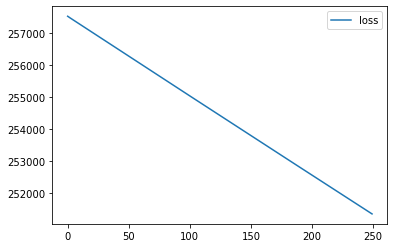

In [61]:
#To know about the loss at each epoch
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [62]:
model.evaluate(X_test,y_test,verbose = 0)

250911.515625

In [63]:
test_predictions = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mean_absolute_error(y_test,test_predictions)

491.45950827558175

In [86]:
mean_squared_error(y_test,test_predictions)

250911.50244762257

In [82]:
#predicting on new feature
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[6.2420554]], dtype=float32)

In [83]:
#saving the trained model in keras
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [85]:
#loading the saved model later in another notebook
later_model = load_model('my_gem_model.h5')
#And we can do all the prediction like task on the model loaded.
later_model.predict(new_gem)

array([[6.2420554]], dtype=float32)